# Multi-section ST data

This tutorial will guide you through the process of running SpaHDmap on multi-section data.

This example uses a 10X Visium dataset of sonic hedgehog (SHH) medulloblastoma from patient-derived orthotopic xenograft (PDOX) mouse models dataset, which has two Palbociclib-treated samples and two untreated control samples. Could be downloaded from [Google drive](https://drive.google.com/drive/u/0/folders/1t-YWXQVOlbnXW1TdMqtV4rRETTacjFiw).

SpaHDmap is designed to work with both single-section and multi-section data. The main difference is that in the multi-section case, you need to provide the path for each section, and the `reference` parameter is used to specify the query-reference pairs for batch effect removal.


## 1. Import necessary libraries

In [1]:
import torch
import numpy as np

import SpaHDmap as map

## 2. Set the parameters and paths

In this section, we will set the parameters and paths for the SpaHDmap model, including:

**Parameters**:
- `rank`: the rank / number of components of the NMF model
- `seed`: the random seed
- `verbose`: whether to print the log information

**Paths**:
- `root_path`: the root path of the experiment
- `project`: the name of the project
- `results_path`: the path to save the results

### Parameters settings

By default, we set the `rank` to 20, the `seed` to 123, and the `verbose` to True. You can modify the parameters according to your data.

In [7]:
rank = 20
seed = 123
verbose = True

np.random.seed(seed)
torch.manual_seed(seed)

### Paths settings

These paths are set with respect to the current directory. You can modify the paths according to your data.

In [8]:
root_path = '../experiments/'
project = 'multi_sections'

results_path = f'{root_path}/{project}/Results_Rank{rank}/'

## 3. Load the data and pre-process

The data used in this tutorial is from the Medulloblastoma dataset, which contains 4 sections, could be downloaded from [Google Driver](https://drive.google.com/drive/u/1/folders/1-a9JAqZr302VpImn_8exRSr1dxZebCSF).

In [9]:
Palbocilib_A = {
    "name": "Palbocilib_A",
    "image_path": "../data/Palbocilib_A/Palbocilib_A.tif",
    "spot_coord_path": "../data/Palbocilib_A/Palbocilib_A_spot_coord.csv",
    "spot_exp_path": "../data/Palbocilib_A/Palbocilib_A_expression_nor_top5541SVGs.csv"
}

Palbocilib_B = {
    "name": "Palbocilib_B",
    "image_path": "../data/Palbocilib_B/Palbocilib_B.tif",
    "spot_coord_path": "../data/Palbocilib_B/Palbocilib_B_spot_coord.csv",
    "spot_exp_path": "../data/Palbocilib_B/Palbocilib_B_expression_nor_top5541SVGs.csv"
}

Control_C = {
    "name": "Control_C",
    "image_path": "../data/Control_C/Control_C.tif",
    "spot_coord_path": "../data/Control_C/Control_C_spot_coord.csv",
    "spot_exp_path": "../data/Control_C/Control_C_expression_nor_top5541SVGs.csv"
}

Control_D = {
    "name": "Control_D",
    "image_path": "../data/Control_D/Control_D.tif",
    "spot_coord_path": "../data/Control_D/Control_D_spot_coord.csv",
    "spot_exp_path": "../data/Control_D/Control_D_expression_nor_top5541SVGs.csv"
}

Different from the case of single-section data, you can choose a reference section for each section to remove the batch effect if necessary.

The `reference` is a dictionary that contains the `Query` section as the key and the `Reference` section as the value.

The query or reference section should be in the section list. No section should be both reference and query.

In [10]:
# Set the reference section for Palbocilib_B and Control_D
reference = {
    'Palbocilib_B': 'Palbocilib_A',
    'Control_D': 'Control_C'
}

Next, we set the scale factor and radius. In current case, all sections have the same scale factor and radius, 

You can also provide the `scale_factor` and `radius` for each section according to your data.

In [11]:
scale_factor = 2
radius = 65

Now, we load the data directly (these data have been preprocessed, including normalization, swapping the coordinates and selecting SVGs)

In [12]:
# Load the data
pal_A = map.prepare_stdata(section_name=Palbocilib_A['name'],
                             image_path=Palbocilib_A['image_path'],
                             spot_coord_path=Palbocilib_A['spot_coord_path'],
                             spot_exp_path=Palbocilib_A['spot_exp_path'],
                             scale_factor=scale_factor,
                             radius=radius,
                             swap_coord=False) # Has been selected in the data

pal_B = map.prepare_stdata(section_name=Palbocilib_B['name'],
                             image_path=Palbocilib_B['image_path'],
                             spot_coord_path=Palbocilib_B['spot_coord_path'],
                             spot_exp_path=Palbocilib_B['spot_exp_path'],
                             scale_factor=scale_factor,
                             radius=radius,
                             swap_coord=False) # Has been selected in the data

ctrl_C = map.prepare_stdata(section_name=Control_C['name'],
                              image_path=Control_C['image_path'],
                              spot_coord_path=Control_C['spot_coord_path'],
                              spot_exp_path=Control_C['spot_exp_path'],
                              scale_factor=scale_factor,
                              radius=radius,
                              swap_coord=False) # Has been selected in the data

ctrl_D = map.prepare_stdata(section_name=Control_D['name'],
                              image_path=Control_D['image_path'],
                              spot_coord_path=Control_D['spot_coord_path'],
                              spot_exp_path=Control_D['spot_exp_path'],
                              scale_factor=scale_factor,
                              radius=radius,
                              swap_coord=False) # Has been selected in the data

*** Reading and preparing data from scratch for section Palbocilib_A ***
Pre-processing gene expression data for 3073 spots and 5541 genes.


/home/qk/projects/SpaHDmap/SpaHDmap/data/data_util.py:259: UserWarning: Coordinates are not swapped. Make sure the coordinates are in the correct order.
  warnings.warn("Coordinates are not swapped. Make sure the coordinates are in the correct order.")
/home/qk/projects/SpaHDmap/SpaHDmap/data/data_util.py:263: UserWarning: Data seems to be already normalized, skipping normalization.
  warnings.warn("Data seems to be already normalized, skipping normalization.")


Processing image, seems to be HE image.
*** Reading and preparing data from scratch for section Palbocilib_B ***
Pre-processing gene expression data for 2957 spots and 5541 genes.


/home/qk/projects/SpaHDmap/SpaHDmap/data/data_util.py:259: UserWarning: Coordinates are not swapped. Make sure the coordinates are in the correct order.
  warnings.warn("Coordinates are not swapped. Make sure the coordinates are in the correct order.")
/home/qk/projects/SpaHDmap/SpaHDmap/data/data_util.py:263: UserWarning: Data seems to be already normalized, skipping normalization.
  warnings.warn("Data seems to be already normalized, skipping normalization.")


Processing image, seems to be HE image.
*** Reading and preparing data from scratch for section Control_C ***
Pre-processing gene expression data for 4392 spots and 5541 genes.


/home/qk/projects/SpaHDmap/SpaHDmap/data/data_util.py:259: UserWarning: Coordinates are not swapped. Make sure the coordinates are in the correct order.
  warnings.warn("Coordinates are not swapped. Make sure the coordinates are in the correct order.")
/home/qk/projects/SpaHDmap/SpaHDmap/data/data_util.py:263: UserWarning: Data seems to be already normalized, skipping normalization.
  warnings.warn("Data seems to be already normalized, skipping normalization.")


Processing image, seems to be HE image.
*** Reading and preparing data from scratch for section Control_D ***
Pre-processing gene expression data for 4325 spots and 5541 genes.


/home/qk/projects/SpaHDmap/SpaHDmap/data/data_util.py:259: UserWarning: Coordinates are not swapped. Make sure the coordinates are in the correct order.
  warnings.warn("Coordinates are not swapped. Make sure the coordinates are in the correct order.")
/home/qk/projects/SpaHDmap/SpaHDmap/data/data_util.py:263: UserWarning: Data seems to be already normalized, skipping normalization.
  warnings.warn("Data seems to be already normalized, skipping normalization.")


Processing image, seems to be HE image.


If you want to select SVGs for your data, you can still use `select_svgs` to complete the task. The only difference from the single-section situation is that you need to provide a list of sections. Then, `select_svgs` will first check the overlapping genes and select the SVGs based on the rank of the Moran Index across all sections.

In [13]:
# map.select_svgs([pal_A, pal_B, ctrl_C, ctrl_D], n_top_genes=3000)

## 4. Run SpaHDmap

Same to case of analyzing HE-image 10X Visium ST data, we initialize the Fuser object and run SpaHDmap.

A little difference is that, in this case, `Fuser` receives a list of sections in the parameter `section`. Additionally, the parameter `reference` is a dictionary that assigns the reference section for each query section, which by default is None and is optional for removing batch effect.

Another difference from the single-section situation is as follows:
1. NMF is performed jointly on all sections to obtain the NMF score for each section.
2. For GCN and VD, a graph is created for each section individually.
3. SpaHDmap is pretrained and trained jointly on all sections to obtain the SpaHDmap score for each section.


In [14]:
# Initialize the SpaHDmap runner
fuser = map.Fuser([pal_A, pal_B, ctrl_C, ctrl_D], reference=reference, results_path=results_path, rank=rank, verbose=True)

# Run all steps in one function
fuser.run_SpaHDmap()

*** Using GPU ***
*** Preparing the tissue splits and creating pseudo spots... ***
For section Palbocilib_A, divide the tissue into 618 sub-tissues, For section Palbocilib_B, divide the tissue into 651 sub-tissues, For section Control_C, divide the tissue into 823 sub-tissues, For section Control_D, divide the tissue into 796 sub-tissues, and create 15000 pseudo spots
and create 15000 pseudo spots
and create 20000 pseudo spots
and create 20000 pseudo spots
Step 1: Run NMF
*** Performing NMF... ***
*** Visualizing and saving the embeddings of NMF... ***
Step 2: Pre-train the SpaHDmap model
[Iter: 200 / 5000], Epoch: 3, Loss: 0.051039, Learning rate: 3.984269e-04
[Iter: 400 / 5000], Epoch: 5, Loss: 0.015841, Learning rate: 3.937323e-04
[Iter: 600 / 5000], Epoch: 7, Loss: 0.000828, Learning rate: 3.859904e-04
[Iter: 800 / 5000], Epoch: 9, Loss: 0.000424, Learning rate: 3.753232e-04
[Iter: 1000 / 5000], Epoch: 11, Loss: 0.000325, Learning rate: 3.618989e-04
[Iter: 1200 / 5000], Epoch: 14, 

/home/qk/projects/SpaHDmap/SpaHDmap/utils/visualize.py:66: RuntimeWarning: invalid value encountered in divide
  tmp_score = score[idx, :, :] if use_score == 'SpaHDmap' else score[idx, :, :] / score[idx, :, :].max()
/home/qk/projects/SpaHDmap/SpaHDmap/utils/visualize.py:73: RuntimeWarning: invalid value encountered in cast
  resized_score = cv2.resize(filtered_score.astype(np.uint8),


Step 4: Run Voronoi Diagram


/home/qk/projects/SpaHDmap/SpaHDmap/train.py:665: RuntimeWarning: Mean of empty slice.
  mean_score_input = smooth_input[nonzero_index_input[0], nonzero_index_input[1]].mean()
/home/qk/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/qk/projects/SpaHDmap/SpaHDmap/train.py:672: RuntimeWarning: Mean of empty slice.
  mean_change = diff_mat1[nonzero_index[0], nonzero_index[1]].mean()
/home/qk/projects/SpaHDmap/SpaHDmap/train.py:678: RuntimeWarning: Mean of empty slice.
  mean_score_output = smooth_output[nonzero_index_input[0], nonzero_index_input[1]].mean()


Step 5: Train the SpaHDmap model
*** Training the model... ***
[Iter: 200 / 2000], Epoch: 3,Image Loss: 0.012403, Expression Loss: 0.317137, Total Loss: 0.115631,Learning rate: 4.522638e-03
[Iter: 400 / 2000], Epoch: 5,Image Loss: 0.004709, Expression Loss: 0.314348, Total Loss: 0.109435,Learning rate: 3.272888e-03
[Iter: 600 / 2000], Epoch: 7,Image Loss: 0.003678, Expression Loss: 0.314955, Total Loss: 0.107724,Learning rate: 1.728112e-03
[Iter: 800 / 2000], Epoch: 9,Image Loss: 0.003399, Expression Loss: 0.314190, Total Loss: 0.107050,Learning rate: 4.783620e-04
[Iter: 1000 / 2000], Epoch: 11,Image Loss: 0.003139, Expression Loss: 0.316089, Total Loss: 0.107119,Learning rate: 1.000000e-06
[Iter: 1200 / 2000], Epoch: 14,Image Loss: 0.003535, Expression Loss: 0.314609, Total Loss: 0.107442,Learning rate: 3.621934e-04
[Iter: 1400 / 2000], Epoch: 16,Image Loss: 0.003951, Expression Loss: 0.315050, Total Loss: 0.109003,Learning rate: 2.625068e-04
[Iter: 1600 / 2000], Epoch: 18,Image Loss:

After training, NMF, GCN and SpaHDmap scores are available now.

In [15]:
pal_A

STData object for section: Palbocilib_A
Number of spots: 3073
Number of genes: 5541
Image shape: (3, 7547, 7174)
Scale factor: 2
Spot radius: 32
Image type: HE
Available scores: NMF, GCN, VD, SpaHDmap

We can visualize the SpaHDmap score for a specific section and index, `section` can be a (name of) section or a list of sections (names), if `None`, all sections will be visualized.
 
In this case, we visualize the NMF, GCN and SpaHDmap score for the section 'Palbocilib_A' and the index 2.

*** Visualizing and saving the embeddings of NMF... ***


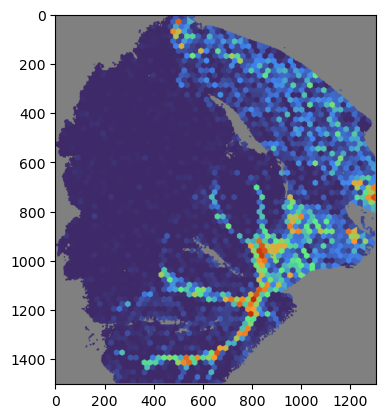

In [19]:
# Visualize the NMF score
fuser.visualize(pal_A, score='NMF', index=2)
# fuser.visualize('Palbocilib_A', score='NMF', index=2) # visualize pal_A given the name

*** Visualizing and saving the embeddings of GCN... ***


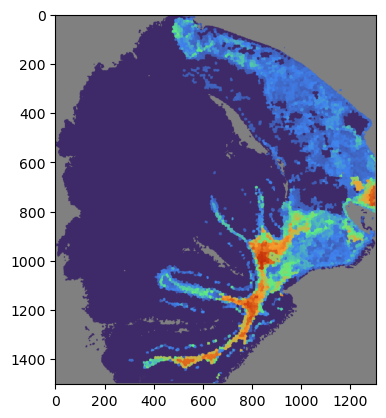

In [20]:
# Visualize the GCN score
fuser.visualize(pal_A, score='GCN', index=2)

*** Visualizing and saving the embeddings of SpaHDmap... ***


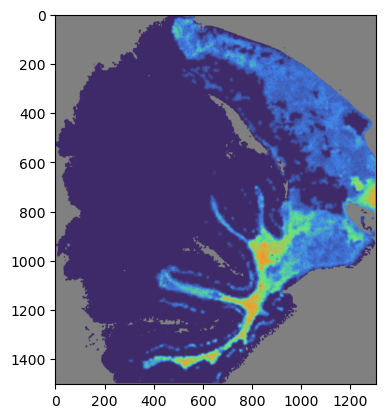

In [16]:
# Visualize the SpaHDmap score
fuser.visualize(pal_A, score='SpaHDmap', index=2)

and visualize both section `Palbocilib_A` and `Palbocilib_B`.

*** Visualizing and saving the embeddings of SpaHDmap... ***


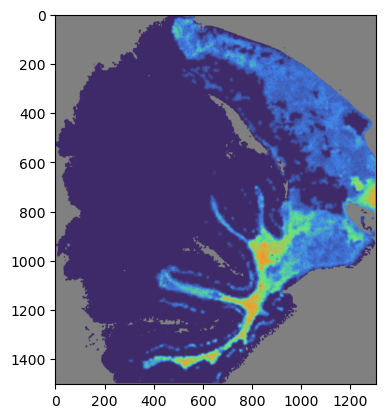

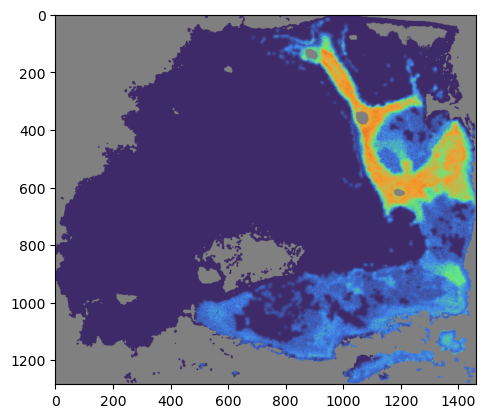

In [17]:
# Visualize multiple sections
fuser.visualize([pal_A, pal_B], score='SpaHDmap', index=2)
# fuser.visualize(['Palbocilib_A', 'Palbocilib_B'], score='NMF', index=2) # visualize multiple sections given the names

Or visualize SpaHDmap embedding for all section

*** Visualizing and saving the embeddings of SpaHDmap... ***


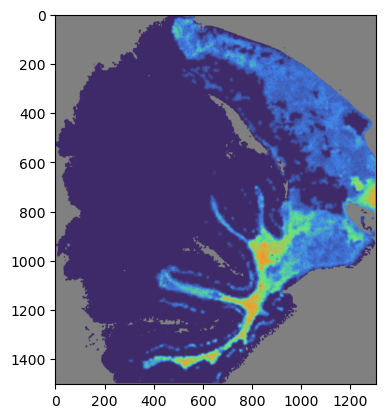

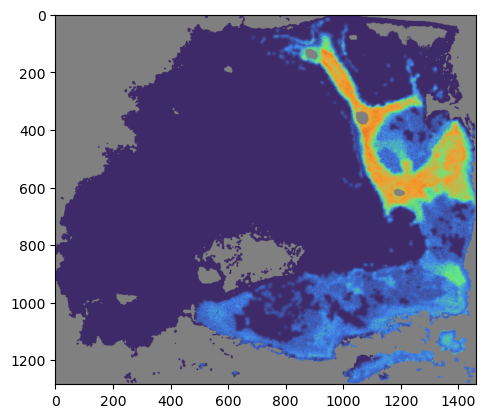

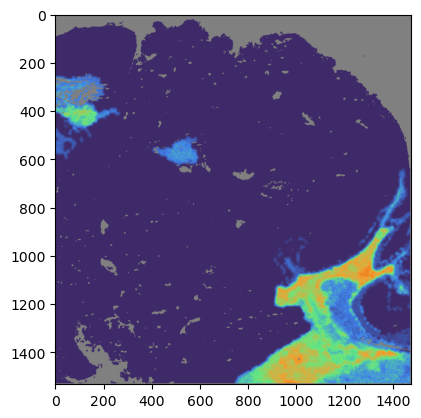

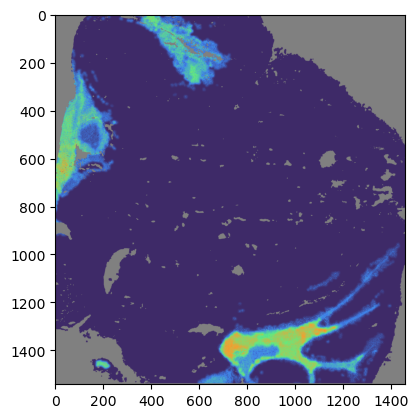

In [21]:
# Visualize all sections for specific index
fuser.visualize(score='SpaHDmap', index=2)

Also, we can visualize without specifying the index, all SpaHDmap scores will be saved in `results_path/section_name/SpaHDmap`.

In [22]:
# Visualize all sections and all embeddings
fuser.visualize(score='SpaHDmap')

*** Visualizing and saving the embeddings of SpaHDmap... ***


The final metagene matrix is stored in the `metagene` attribute of the Fuser object.

In [18]:
fuser.metagene.head()

,Embedding_1,Embedding_2,Embedding_3,Embedding_4,Embedding_5,Embedding_6,Embedding_7,Embedding_8,Embedding_9,Embedding_10,Embedding_11,Embedding_12,Embedding_13,Embedding_14,Embedding_15,Embedding_16,Embedding_17,Embedding_18,Embedding_19,Embedding_20
hg38-RPL34,0.052079,1.414215,0.429467,0.363420,2.433822,1.737115,1.815011,0.558766,0.747161,0.726652,0.854559,0.498651,1.439057,0.000000,0.100587,0.491497,0.072647,1.182649,3.865385,0.317709
hg38-H3F3A,0.000000,0.765472,0.206629,0.418949,1.482516,1.901523,1.828479,0.694126,0.611753,0.343279,0.631370,0.676598,2.725980,0.000000,0.564267,0.441738,0.340072,1.449202,3.665593,0.326130
hg38-B2M,0.144772,1.917086,0.149577,0.358159,1.072371,1.733270,0.990867,0.350434,0.345053,0.319875,0.505022,0.206427,0.981348,0.000000,0.227518,0.241880,0.141098,0.586911,2.533695,0.274898
hg38-RPS3A,0.000000,1.232782,0.331815,0.297787,1.807933,1.202884,1.515652,0.496499,0.449433,0.527245,0.708033,0.504399,1.809724,0.000000,0.000000,0.416607,0.078165,1.174963,3.808420,0.384776
hg38-TMSB10,0.358722,0.676455,0.517182,0.358830,1.839631,3.363164,1.655192,0.635978,0.669491,0.766365,0.684043,0.305091,2.093455,0.033633,0.000000,0.506923,0.103008,0.698912,2.740572,0.229125
